In [1]:
import welly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

#### Well logs in the Münsterland and lower rhein embayment region of Germany.

List of wells Longest to shortest Measured depth are:

munst1 = Münsterland-1 

darf1 = Darfeld-1

bSteinfur1 = Burgsteinfurt-1

bHorst1 = Borghorst-1

vMold1 = Versmold-1

hast1 = HASTENRATH -1

hast2 = HASTENRATH -2

rwth1  = RWTH-1  

Mol - GT - 01 #Not yet included:

Californie - GT

In [3]:
path = 'C:\\Users\\ada55080\\well_data\\'

In [4]:
#read the LAS files 

#Münsterland
munst1 = welly.Well.from_las(path + 'Muensterland_1\\18018_Muensterland-1.las')
darf1 = welly.Well.from_las(path + 'Darfeld_1\\17943_phy_Darfeld-1_SP_RES.las')
bsteinfur1 = welly.Well.from_las(path + 'Burgsteinfurt_1\\12453_phy_Burgsteinfurt-1_CALI_SP_SN_LN_LAT_RES_SPN.las')
bhorst1 = welly.Well.from_las(path + 'Borghorst_1\\12646_phy_Borghorst-1_SN_LN_LAT_RES_SP.las')
vmold1 = welly.Well.from_las(path + 'Versmold_1\\33579_phy_GE-1124_Versmold1_Composite.las')

#The Netherlands
calie = welly.Well.from_las(path + 'californie-GT-02\\5673_calgt02_2012_comp.las')

# loosely Georeferenced Aachen Area
rwth1 = welly.Well.from_las(path + 'RWTH1W1\\results_23_8_05.las') 
hast1 = welly.Well.from_las(path + 'HAST\\314532 HAST 1.las')
hast2 = welly.Well.from_las(path + 'HAST\\331686_HAST 2.las')

In [41]:

caliX = (303075.42-292940.4123)

#

caliX = 6.08350*((303075.42-292940.4123)/(6.293797-6.078583178011505))
caliY = 51.48896*((5629294.00-5629218.74)/(50.78933-50.778202131799475))+5500000
#caliY = 51.48896*((303075.42-292940.4123)/(6.293797-6.078583178011505))
caliY

5848230.142535809

In [42]:
#Adding missing location data

hast1.name = 'hast1'
hast1.location.x = 303075.42
hast1.location.y = 5629294.00
hast1.location.latitude = 50.789331#° N
hast1.location.longitude = 6.293797#° E
hast1.location.datum = 'WGS 84'

hast2.name = 'hast2'
hast2.location.x = 303075.42
hast2.location.y = 5629294.00
hast2.location.latitude = 50.789331#° N
hast2.location.longitude = 6.293797#° E
hast2.location.datum = 'WGS 84'

calie.name = 'caliefornie-GT-02'
calie.location.x = caliX
calie.location.y = caliY
calie.location.latitude = 51.48896#° N
calie.location.longitude = 6.08350#° E
calie.location.datum = 'WGS 84'

rwth1.location.x = 292940.4123
rwth1.location.y = 5629218.74
rwth1.location.latitude = 50.778202131799475#° N
rwth1.location.longitude = 6.078583178011505#° E
rwth1.location.datum = 'WGS 84'

In [43]:
#Checks that the LAS are read
vmold1, bhorst1, bsteinfur1, darf1, munst1, hast1, hast2, rwth1

(Well(uwi: '33579', name: 'Versmold 1', 6 curves: ['BS', 'CALI', 'GR', 'LITHO', 'SL3', 'MDSS']),
 Well(uwi: '', name: 'BORGHORST 1', 9 curves: ['DEPT:2', 'BS', 'MNOR', 'MINV', 'SN', 'LN', 'LAT', 'RES', 'SP']),
 Well(uwi: '', name: 'BURGSTEINFURT 1', 10 curves: ['DEPT:2', 'BS', 'CALI', 'SP', 'LL7', 'SN', 'LN', 'LAT', 'RES', 'SPN']),
 Well(uwi: '', name: 'DARFELD 1', 3 curves: ['DEPT:2', 'SP', 'RES']),
 Well(uwi: '', name: 'MUENSTERLAND 1', 13 curves: ['DEPT:2', 'BS', 'CALI', 'DT', 'DTDS', 'DTF', 'GR', 'RKRL', 'RLLC', 'RL18', 'RN16', 'RN64', 'SP']),
 Well(uwi: '', name: '', 11 curves: ['SGRRAW', 'SGR', 'SGRRAW_COR', 'SGR_COR', '232TH', '238U', '40K', 'GRRAW', 'GR', 'GRRAW_COR', 'GR_COR']),
 Well(uwi: '', name: '', 23 curves: ['TEMP', 'TILT', 'TVD', 'GR', 'GR_COR', 'GRRAW', 'GRRAW_COR', 'NORTHING', 'SAL', 'SGR', 'SGR_COR', 'SGRRAW', 'SGRRAW_COR', 'SUSZ', 'CLOSUREANG', 'CLOSUREDIS', 'EASTING', 'FEL', '232TH', '238U', '40K', 'AZIMUTH', 'CAL3']),
 Well(uwi: '', name: 'RWTH 1', 8 curves: ['GR

In [44]:
_wells = [vmold1, bhorst1, bsteinfur1, darf1, munst1, rwth1, hast1, hast2, calie]

In [45]:
# building lists of well inputs

cols = {'well': _wells}
#loc_df = pd.DataFrame(cols)
_lat = []
_long = []
_x = []
_y = []
_wellnames = []
for i in range(len(_wells)):#, range(len(_wells))):
    _wellnames.append(_wells[i].name)
    _lat.append(_wells[i].location.latitude)
    _long.append(_wells[i].location.longitude)
    _x.append(_wells[i].location.x)
    _y.append(_wells[i].location.y)

for well in _wells:
    print(well.location)

_long, _lat, _x , _y

Location({'position': None, 'crs': CRS({}), 'latitude': 51.970168249872, 'longitude': 8.10680075009664, 'x': 438641.23, 'y': 5758096.99, 'datum': 'WGS 84', 'township': 'Sassenberg/ Dackmar, Flur 3, Flurstuck 163', 'td': None, 'deviation': None})
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': 'BRD', 'state': '', 'county': '', 'latitude': 5777445, 'longitude': 2600380, 'x': 394910.68, 'y': 5775672.32, 'datum': '', 'api': 462008600101.0, 'td': None, 'deviation': None})
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': 'BRD', 'state': '', 'county': '', 'latitude': 5782150, 'longitude': 2595695, 'x': 390425.93, 'y': 5780565.18, 'datum': '', 'api': 462011700101.0, 'td': None, 'deviation': None})
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': 'BRD', 'state': '', 'county': '', 'latitude': 5769500, 'longitude': 2589130, 'x': 383346.04, 'y': 5768201.56, 'datum': '', 'api': 462014500101.0, 'td': None, 'deviation': None})
Locatio

([8.10680075009664,
  2600380,
  2595695,
  2589130,
  '',
  6.078583178011505,
  6.293797,
  6.293797,
  6.0835],
 [51.970168249872,
  5777445,
  5782150,
  5769500,
  '',
  50.778202131799475,
  50.789331,
  50.789331,
  51.48896],
 [438641.23,
  394910.68,
  390425.93,
  383346.04,
  386176.36,
  292940.4123,
  303075.42,
  303075.42,
  286488.65938659804],
 [5758096.99,
  5775672.32,
  5780565.18,
  5768201.56,
  5763283.15,
  5629218.74,
  5629294.0,
  5629294.0,
  5848230.142535809])

In [46]:
from shapely.geometry import Point

#building geoDataFrames 

_geometry = [Point(xy) for xy in zip(_x, _y)]
cols = {'well': _wellnames, 'lat' : _lat, 'long' : _long}#, geometry: _geometry }
df = pd.DataFrame(cols)
loc_gdf = gpd.GeoDataFrame(cols, geometry=_geometry, crs='EPSG:32633')
#_wells[1].location.latitude
loc_gdf
#_wells[i].name

,well,lat,long,geometry
0,Versmold 1,51.9701682499,8.1068007501,POINT (438641.230 5758096.990)
1,BORGHORST 1,5777445,2600380,POINT (394910.680 5775672.320)
2,BURGSTEINFURT 1,5782150,2595695,POINT (390425.930 5780565.180)
3,DARFELD 1,5769500,2589130,POINT (383346.040 5768201.560)
4,MUENSTERLAND 1,,,POINT (386176.360 5763283.150)
5,RWTH 1,50.7782021318,6.078583178,POINT (292940.412 5629218.740)
6,,50.789331,6.293797,POINT (303075.420 5629294.000)
7,,50.789331,6.293797,POINT (303075.420 5629294.000)
8,CAL-GT-02,51.48896,6.0835,POINT (286488.659 5848230.143)


<Axes: >

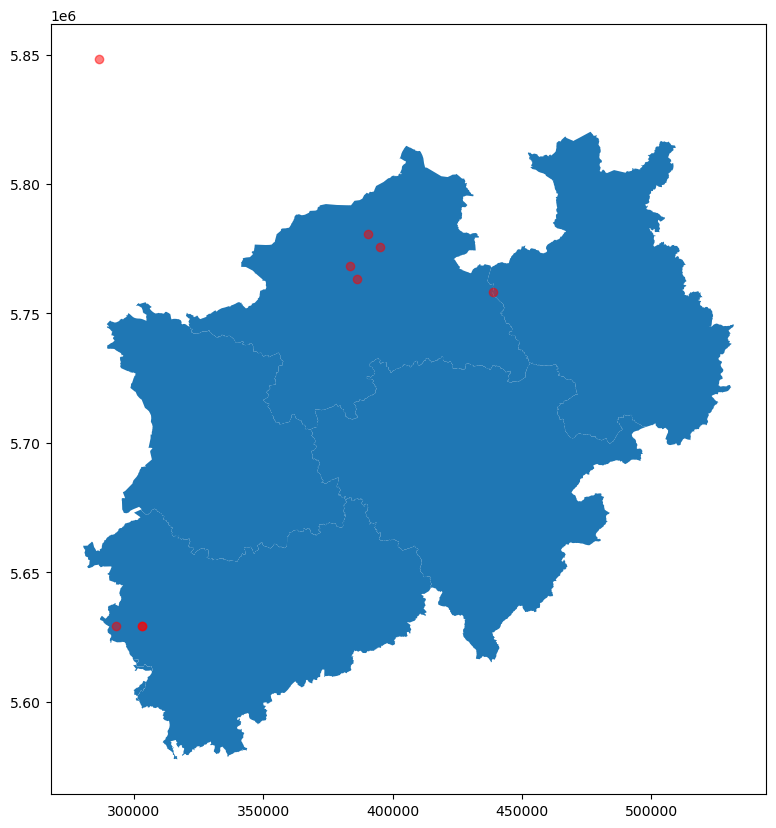

In [47]:
# and plotting
de = gpd.read_file('C:\\Users\\ada55080\\maps_and_shape_files\\germany\\NRW\\dvg2rbz_nw.shp', set_crs='EPSG:4326')
loc_gdf.plot(ax=de.plot(figsize=(10,10)), marker='o', color='red', legend=True, alpha=.5)